Import important libraries

In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Twitter_train.csv")
test = pd.read_csv("Twitter_test.csv")

In [3]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
test.isnull().sum()

id       0
tweet    0
dtype: int64

**Now Check Non-Racist/Sexist Tweets**

In [8]:
train[train['label']==0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


**Check Racist/Sexist tweets**

In [9]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [10]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In the train dataset, we have 2,242 (7%) tweets labeled as racist or sexist, and 29,720 (93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

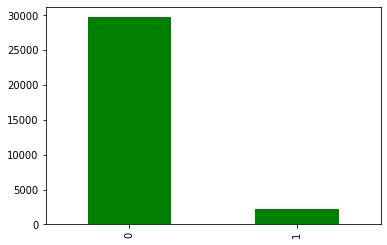

In [11]:
#lets see its pictorial representation
train['label'].value_counts().plot.bar(color = 'g', figsize = (6, 4))

Now we will check the distribution of tweets in our dataset

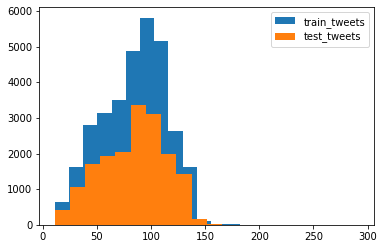

In [12]:
length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend()
plt.show()

In [13]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [14]:
train.groupby('label').describe()

id                                   ...   len                    
         count          mean          std   min  ...   25%   50%    75%    max
label                                            ...                          
0      29720.0  15974.454441  9223.783469   1.0  ...  62.0  88.0  107.0  274.0
1       2242.0  16074.896075  9267.955758  14.0  ...  69.0  96.0  111.0  152.0

[2 rows x 16 columns]

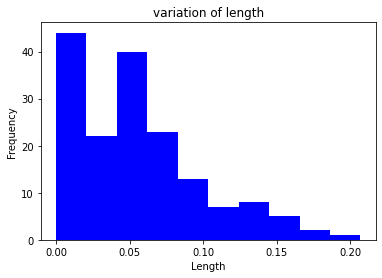

In [15]:
train.groupby('len').mean()['label'].plot.hist(color = 'blue', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

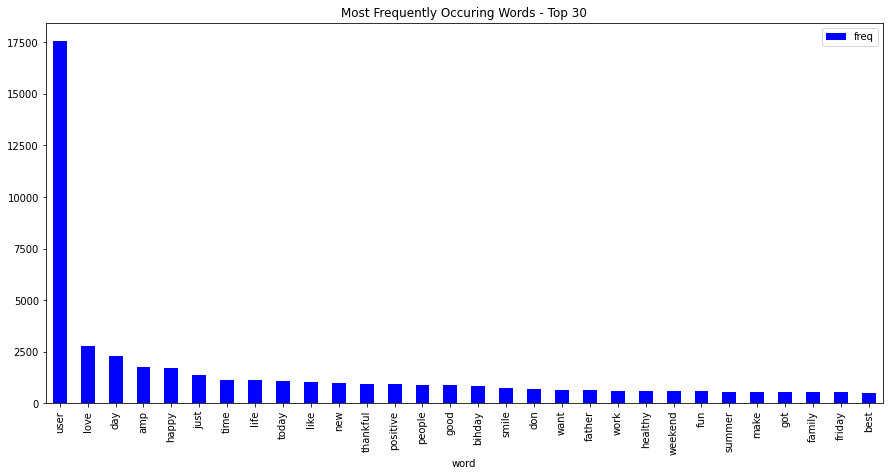

In [16]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

**Non-racist/Sexist tweets**

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

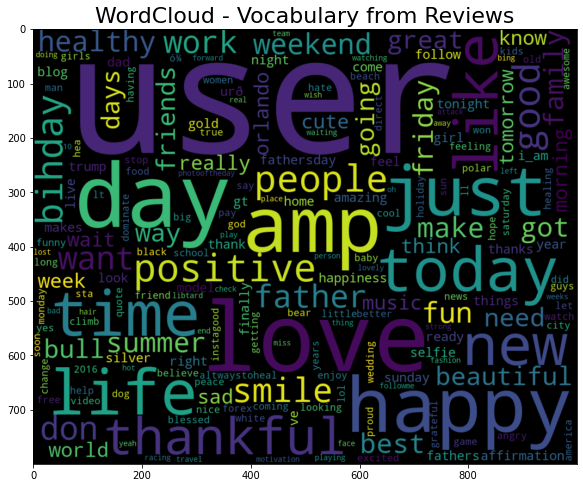

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'Black', width = 1000, height = 800).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

**Neutral tweets**

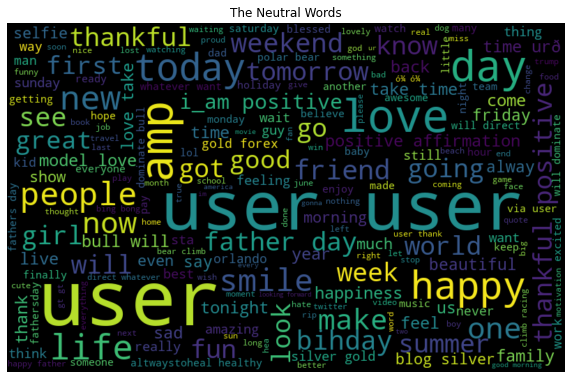

In [18]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

**Racist/Sexist Tweets**

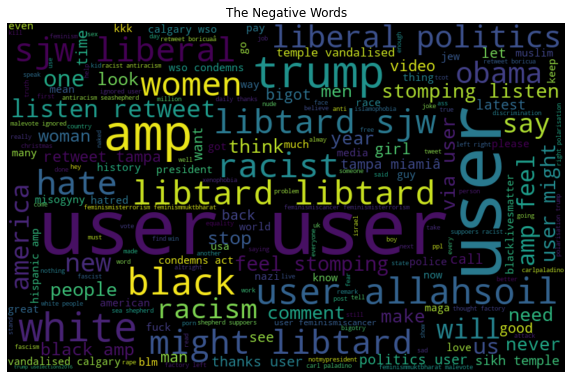

In [19]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'black', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

**Understanding the impact of Hashtags on tweets sentiment**

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point of time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

The tweet seems sexist in nature and the hashtags in the tweet convey the same feeling.

We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [20]:
# collecting the hashtags
import re

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [21]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

**Non-racist/Sexist Tweets**

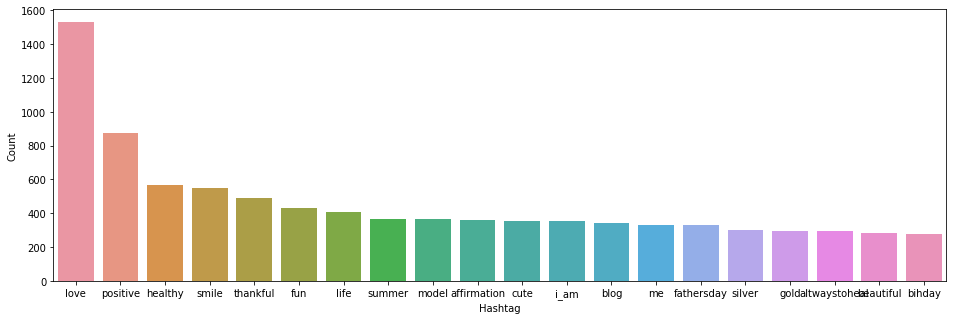

In [22]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

**Racist/Sexist Tweets**

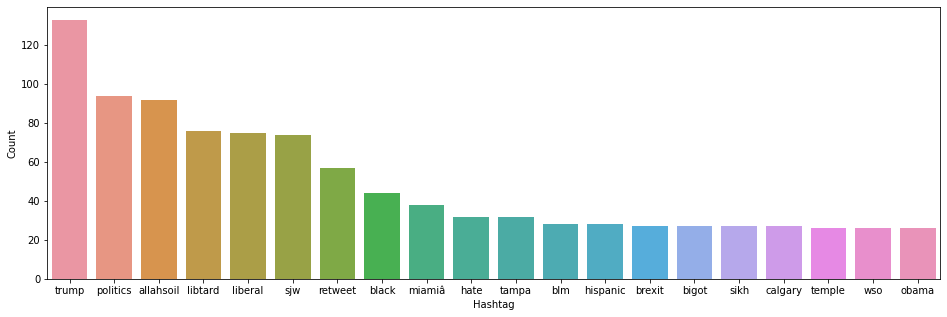

In [23]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

**Word to Vector Features**

Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like King -man +woman = Queen

**Word2Vec Embeddings**

Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

Let’s train a Word2Vec model on our corpus.

In [25]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109500, 8411580)

In [26]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6471230983734131),
 ('#boardgames', 0.6100095510482788),
 ('#prosecco', 0.6004533767700195),
 ('podium', 0.5924318432807922),
 ('sister!!', 0.5884004831314087),
 ('bay.', 0.586405873298645),
 ('kayak,', 0.5816826820373535),
 ('pampered', 0.5801268815994263),
 ('#wanderlust', 0.5797650218009949),
 ('#restaurant', 0.5797605514526367)]

In [27]:
model_w2v.wv.most_similar(positive = "cancer")

[('law.', 0.7283512949943542),
 ('ways.', 0.712944746017456),
 ('ownership', 0.7117853760719299),
 ('devoted', 0.7107788920402527),
 ('tolerance', 0.7069418430328369),
 ('level.', 0.7048248648643494),
 ('champion,', 0.7045709490776062),
 ('disregard', 0.7039173245429993),
 ('harassment', 0.7037967443466187),
 ('spewing', 0.7022935748100281)]

In [28]:
model_w2v.wv.most_similar(positive = "trump")

[('rally.', 0.5754055976867676),
 ('#delegaterevolt', 0.5639895796775818),
 ('donald', 0.5637184381484985),
 ('churchill', 0.5560249090194702),
 ('carl', 0.554617166519165),
 ('fuhered', 0.5535669326782227),
 ('#dumptrump', 0.5482975244522095),
 ('suppoer', 0.537948727607727),
 ('unfit', 0.5377249717712402),
 ('suppoer.', 0.5376483798027039)]

In [29]:
model_w2v.wv.most_similar(positive = "apple")

[('mytraining', 0.7155131101608276),
 ('"mytraining"', 0.7138522863388062),
 ('training"', 0.6995790004730225),
 ('app,', 0.6639129519462585),
 ('"my', 0.6208876967430115),
 ('ta', 0.5972235202789307),
 ('app', 0.5935736894607544),
 ('bees', 0.5794168710708618),
 ('blog!', 0.5681056976318359),
 ('humans.', 0.5590444207191467)]

In [30]:
model_w2v.wv.most_similar(negative = "hate")

[('#apple', -0.03973944112658501),
 ('#amwriting', -0.04474007338285446),
 ('#grateful', -0.04795288294553757),
 ('#yay', -0.05413012206554413),
 ('currently', -0.06651273369789124),
 ('#games', -0.06696899235248566),
 ('#gym', -0.06893233209848404),
 ('#blessed', -0.0695168673992157),
 ('ð\x9f\x98\x81', -0.07111836969852448),
 ('excited,', -0.07779663801193237)]

**Preparing Vectors for Tweets**

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [31]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [32]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 

wordvec_df.shape

(31962, 200)

***Data Cleaning***

In [35]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [37]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [38]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [39]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [40]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [41]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

**Logistic Regression**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [43]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [44]:
y_pred1 = model_lr.predict(x_valid)

In [45]:
print("Training Accuracy :", model_lr.score(x_train, y_train))
print("Validation Accuracy :", model_lr.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred1))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred1)
print(cm)

Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


**Random Forest**

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
model_rf = RandomForestClassifier()

In [48]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [49]:
y_pred2 = model_rf.predict(x_valid)

In [50]:
print("Training Accuracy :", model_rf.score(x_train, y_train))
print("Validation Accuracy :", model_rf.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred2))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred2)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9519459391815793
f1 score : 0.6057494866529775
[[7312  120]
 [ 264  295]]


**Support Vector Machine (SVM)**

In [51]:
from sklearn.svm import SVC

In [52]:
model_sv = SVC()

In [53]:
model_sv.fit(x_train, y_train)

SVC()

In [54]:
y_pred3 = model_sv.predict(x_valid)

In [55]:
print("Training Accuracy :", model_sv.score(x_train, y_train))
print("Validation Accuracy :", model_sv.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred3))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred3)
print(cm)

Training Accuracy : 0.978181969880272
Validation Accuracy : 0.9521962207483419
f1 score : 0.4986876640419947
[[7419   13]
 [ 369  190]]


**Decision Tree Classifier**

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model_dtc = DecisionTreeClassifier()

In [58]:
model_dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [59]:
y_pred4 = model_dtc.predict(x_valid)

In [60]:
print("Training Accuracy :", model_dtc.score(x_train, y_train))
print("Validation Accuracy :", model_dtc.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred4))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred4)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9338005255912902
f1 score : 0.546700942587832
[[7143  289]
 [ 240  319]]


**XGBoost Classifier**

In [61]:
from xgboost import XGBClassifier

In [62]:
model_xgb = XGBClassifier()

In [63]:
model_xgb.fit(x_train, y_train)

XGBClassifier()

In [64]:
y_pred5 = model_xgb.predict(x_valid)

In [65]:
print("Training Accuracy :", model_xgb.score(x_train, y_train))
print("Validation Accuracy :", model_xgb.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred5))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred5)
print(cm)

Training Accuracy : 0.9445997246673064
Validation Accuracy : 0.9433112251282693
f1 score : 0.35378031383737524
[[7414   18]
 [ 435  124]]
